In [2]:
import numpy as np
import pandas as pd 

In [3]:
pd.__version__

'1.0.1'

In [7]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [8]:
df = pd.DataFrame(data, index = labels)

In [9]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [10]:
# 返回dataframe的前3行
df.iloc[:3,]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [12]:
# 从numpy数组构造dataframe
df2 = pd.DataFrame(np.array([ [1,2,3], [4,5,6], [7,8,9] ]), columns=['a','b','c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [14]:
## 通过其他DataFrame来创建DataFrame df3
df3 = df2[['a','b','c']].copy()
df3

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [20]:
## 从csv文件中每隔n行来创建DataFrame
#f = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
## 用series创建DataFrame
s_1 = pd.Series(data['animal'])
s_2 = pd.Series(data['age'])
s_3 = pd.Series(data['visits'])
s_4 = pd.Series(data['priority'])
pd_2 = pd.DataFrame([s_1,s_2,s_3,s_4])
pd_2

,0,1,2,3,4,5,6,7,8,9
0,cat,cat,snake,dog,dog,cat,snake,cat,dog,dog
1,2.5,3,0.5,NaN,5,2,4.5,NaN,7,3
2,1,3,2,3,2,3,1,1,2,1
3,yes,yes,no,yes,no,no,no,yes,no,no


In [22]:
data

{'animal': ['cat',
  'cat',
  'snake',
  'dog',
  'dog',
  'cat',
  'snake',
  'cat',
  'dog',
  'dog'],
 'age': [2.5, 3, 0.5, nan, 5, 2, 4.5, nan, 7, 3],
 'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
 'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

## pandas处理NaN值,缺失值

* dropna(axis=, how=)：丢弃NaN数据，{axis：0(按行丢弃)，1(按列丢弃)} {how：'any'(只要含有NaN数据就丢弃)，'all'(所有数据都为NaN时丢弃)}

* fillna(value=)：将NaN值都设置为value的值

* isnull()：对每各元素进行判断是否是NaN，返回结果矩阵

* np.any(matrix) == value：判断matrix矩阵中是否有value值

* np.all(matrix) == value：判断matrix矩阵中是否所有元素都是value值

###  pandas读取数据、导出数据 

**根据数据的格式，pandas提供了多种数据读取和导出的方法，如：**

* 读取数据：read_csv、read_table、read_fwf、read_clipboard、read_excel、read_hdf

* 导出数据：to_csv、to_table、to_fwf、to_clipboard、to_excel、to_hdf

# pandas合并数据

### concat方法 
#### 是拼接函数，有行拼接和列拼接，
#### 默认是行拼接，拼接方法默认是外拼接(并集)，拼接对象是pandas数据类型。

* 第一个参数：需要合并的矩阵

* axis：合并维度，0：按行合并，1：按列合并

* join：处理非公有 列/行 的方式，inner：去除非公有的 列/行，outer：对非公有的 列/行 进行NaN值填充然后合并

* ignore_index：是否重排行索引

In [23]:
df1 = pd.DataFrame(np.arange(12).reshape(3, 4), columns=['A', 'B', 'C', 'D'], index=[0, 1, 2])
df2 = pd.DataFrame(np.ones((3, 4)), columns=['B', 'C', 'D', 'E'], index=[1, 2, 3])

In [24]:
df1

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [25]:
df2

,B,C,D,E
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0


In [26]:
print(pd.concat([df1, df2], join='outer', ignore_index=True)) # join = {'outer', 'inner'}

     A    B     C     D    E
0  0.0  1.0   2.0   3.0  NaN
1  4.0  5.0   6.0   7.0  NaN
2  8.0  9.0  10.0  11.0  NaN
3  NaN  1.0   1.0   1.0  1.0
4  NaN  1.0   1.0   1.0  1.0
5  NaN  1.0   1.0   1.0  1.0


In [29]:
df = pd.DataFrame([[1, 2], [3, 4]])
df

,0,1
0,1,2
1,3,4


### append方法
#### 并不能像list的append方法一样对原来的df继续修改，而是建立了一个新的对象。
#### 如果要修改df，那么需要重新对df赋值，所以append的方法执行效率并不是很高。

In [31]:
# append方法在index方向连接两个DataFrame或者对DataFrame进行扩展
# append 方法可以直接用list对DataFrame进行扩展。
df.append([[1,2]])

,0,1
0,1,2
1,3,4
0,1,2


In [39]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

df

,A,B
0,1,2
1,3,4


In [40]:
df2

,A,B
0,5,6
1,7,8


In [41]:
# 也可以将两个DataFrame连接起来。
df3 = df.append(df2)
df3

,A,B
0,1,2
1,3,4
0,5,6
1,7,8


### Join方法 
#### 是基于Index连接DataFrame，连接方法有内连接、外连接**(左连接和右连接)**

In [44]:
caller = pd.DataFrame({'key':['A0','A1','A2','A3','A4','A5'],'B':['B0','B1','B2','B3','B4','B5']})
other = pd.DataFrame({'key':['A0','A1','A2'],'C':['C0','C1','C2']})
caller

,key,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5


In [43]:
other

,key,C
0,A0,C0
1,A1,C1
2,A2,C2


In [45]:
caller.join(other,lsuffix='_caller',rsuffix='_other',how='inner')

,key_caller,B,key_other,C
0,A0,B0,A0,C0
1,A1,B1,A1,C1
2,A2,B2,A2,C2


In [46]:
caller.join(other,lsuffix='_caller',rsuffix='_other',how='outer')

,key_caller,B,key_other,C
0,A0,B0,A0,C0
1,A1,B1,A1,C1
2,A2,B2,A2,C2
3,A3,B3,NaN,NaN
4,A4,B4,NaN,NaN
5,A5,B5,NaN,NaN


### 还有一种merge方法
#### 与Join方法类似，不过语法略有不同。

**通过on连接两个数据集的相同列，how表示连接的方式也有内连接、外连接(左连接和右连接)**

**使用merge方式要求合并的两个DataFrame需要有两数据集有一个相同列（不要求数值完全相同），继续以上面数据为例，对比下区别**

In [47]:
caller

,key,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5


In [48]:
other

,key,C
0,A0,C0
1,A1,C1
2,A2,C2


In [49]:
 pd.merge(caller,other,on = ['key'],how = 'inner')

,key,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


# 第二章：数据的导入与导出

数据导入和导出是pandas中很基础且重要的一个部分。pandas提供了很多不同格式数据的导入和导出方法，可以将其他格式数据转为DataFrame格式。
我们可以将list、dict格式数据转为dataFrame格式，也可以从本地的csv、json等文本格式数据和sql、MongoDB等数据库中读取和保存数据等等。下面就分别以三大类介绍一些常见的数据格式的导入与导出。

引言：
当我们开始着手做一个数据分析项目时，选择和导入数据集是第一个步骤，而导出数据虽然非必需，但有时候我们也需要保存处理或者分析后的结果，方便下次使用。在pandas中，它已经为我们提供了很多不同格式数据的导入和导出方法，本节将具体介绍一些较为常用的方法，包括excel、csv文件以及数据库的导入导出等。

### list、dict、np.array 格式数据

#### list

In [467]:
# 一般读取一个list，生成的结果如下所示：
pd.DataFrame([1,2,3,4])

,0
0,1
1,2
2,3
3,4


In [51]:
# 如果读取的list中每个元素都是一个元祖，会发生什么？
pd.DataFrame([(1,2,3,4), (2,3,4,5)], columns=['value1', 'value2', 'value3', 'value4'])

,value1,value2,value3,value4
0,1,2,3,4
1,2,3,4,5


In [52]:
# 如果忽略columns的话，第二个list的值不是列名，而是默认生成索引名，如下所示：
pd.DataFrame([(1,2,3,4), (2,3,4,5)], ['value1', 'value2'])

,0,1,2,3
value1,1,2,3,4
value2,2,3,4,5


**关于list的总结从面的结果可以知道，列表中的每个原始都是一行信息。列表的长度为多少时，数据框则有多少行**

## dict

In [53]:
data = {'a': [1, 2], 'b': [3, 4]}

In [54]:
# 直接调用DataFrame进行读取的话，生成的dataframe结构如下所示：
pd.DataFrame(data)

,a,b
0,1,3
1,2,4


In [55]:
pd.DataFrame.from_dict(data)   # from_dict这个方法只有在pandas0.23版本后才有的。

,a,b
0,1,3
1,2,4


In [57]:
# 如果想要以a,b作为索引，以list中的每个值分别为一列？
pd.DataFrame.from_dict(data, orient='index', columns = ['value1', 'volue2'])

,value1,volue2
a,1,2
b,3,4


In [58]:
# 每个item作为一行。（没怎么理解）
pd.DataFrame.from_dict(data,orient='index',columns = ['value1','value2']).reset_index().rename(columns = {'index':'key'})

,key,value1,value2
0,a,1,2
1,b,3,4


In [59]:
# 把字典的key和value分别生成两列，
pd.DataFrame(list(data.items()), columns = ['key', 'value'])

,key,value
0,a,"[1, 2]"
1,b,"[3, 4]"


# 文本格式数据

## csv文件

### 导入csv文件

#### 常用参数解析

` pandas.read_csv(filepath_or_buffer, sep=',', header='infer', names=None, index_col = None) `

- filepath_or buffer: str, path object or file-like object。指定传入的文件路径，必须传入的参数。
- sep: str。指定分隔符，默认是逗号分隔符。
- header: int, list or int。指定行数用来作为列名。默认是如果没有传入names参数，则header=0，用第一行作为列名，否则header=None，以传入的names作为列名。另外如果传入的是list，例如[0,1,3]，则是以第1、2、4这些行作为多级列名，且中间的行，第3行会被忽略，数据从第5行开始。
- names: array-like, optional。指定文件的列名。如果文件中没有标题行，建议传入此参数。
- index_col: int, str, or sequence of int / str, or False。指定文件的索引，默认为None

##### ex1.csv内容如下：

```
ID,name,age,city,message
A001, 小明,18, 北京,hello
A002, 小王,20, 杭州,world
A003, 小北,21, 上海,hello
A004, 张三,18, 北京,pandas
导入ex1.csv


df = pd.read_csv('examples/ex1.csv')
df
运行结果：

 	 ID	    name	age	  city	 message
0	A001	小明	    18	  北京	  hello
1	A002	小王	    20	  杭州	  world
2	A003	小北	    21	  上海	  hello
3	A004	张三	    18	  北京	  pandas
```

#### ex2.csv文件没有标题行

```
A001|小明|18|北京|hello
A002|小王|20|杭州|world
A003|小北|21|上海|hello
A004|张三|18|北京|pandas
设置sep和header参数，导入ex2.csv

df2 = pd.read_csv('examples/ex2.csv',sep='|',header=None)
df2
运行结果：

	0	    1	  2	    3	  4
0	A001	小明	  18	北京	  hello
1	A002	小王	  20	杭州	  world
2	A003	小北	  21	上海	  hello
3	A004	张三	  18	北京	  pandas
```

##### 设置sep和names参数，此时header默认为None

```
df3 = pd.read_csv('examples/ex2.csv',sep='|', names = ['ID','name','age','city','message'])

运行结果：

 	ID	   name	  age    city	 message
0	A001	小明	    18	  北京	  hello
1	A002	小王	    20	  杭州	  world
2	A003	小北	    21	  上海	  hello
3	A004	张三	    18	  北京	  pandas
```

### 导出csv数据

**参用参数解析：**

` DataFrame.to_csv(path_or_buf, index=True, header=True, sep=',', encoding='utf-8')`

- path_or_buf: str or file handle。指定保存文件路径，必须传入的参数，默认为None。
- index: bool。导出的csv是否包含索引，默认为True。
- header: bool or list of str。导出的csv是否包含标题行，默认为True。
- sep: str。指定导出的csv文件的分隔符，默认为逗号分隔符。
- encoding: str。指定导出的csv文件的编码，默认为utf-8。
- df.to_csv("output/out_ex1.csv",index=False)


## excel文件

### 导入excel文件

***常用参数解析:***

`pd.read_excel(io, sheet_name=0, header=0, names=None, index_col=None)`

read_excel和read_csv的用法差不多，一个需要注意的参数是**sheet_name**。这个参数是指定读取该excel中具体哪个表的数据，默认为0，即为第一个表。如果传入1，则为第2个表；可指定传入表名，如"Sheet1"；也可传入多个表，如[0,'Sheet3']，传入第一个表和名为'Sheet3'的表。 ***读取ex1.xlsx文件，默认为读取第一个表***

In [71]:
# 默认读取第一个表
df = pd.read_excel('C:/Users/DELL/Desktop/ex1.xlsx', header=None)  # 
df

,0,1,2,3
0,1,5,12,13
1,2,6,11,14
2,3,7,10,15
3,4,8,9,16


In [66]:
## 读取ex1.xlsx中的第二个表
df2 = pd.read_excel('C:/Users/DELL/Desktop/ex1.xlsx', sheet_name = 1)
df2

,a,h,i,p
0,b,g,j,o
1,c,f,k,n
2,d,e,l,m


In [69]:
## 读取第2个表和名称为‘sheet3’的表，
## 返回的对象是：Ordereddict。OrderedDict是dict的子类，他记住了内容的顺序
od = pd.read_excel('C:/Users/DELL/Desktop/ex1.xlsx', sheet_name = [1, 'Sheet3'])
od

{1:    a  h  i  p
 0  b  g  j  o
 1  c  f  k  n
 2  d  e  l  m, 'Sheet3':    aa  hh  ii  tt
 0  bb  gg  jj  kk
 1  cc  ff  kk  nn
 2  dd  ee  ll  mm}

**在这个orderedDict中，有两个key。第一个key是1，对应的value为该表的内容；第二个key是'Sheet3',对应的value是Sheet3表格的内容。我们选取key，就能得到相应的value。**

In [73]:
od[1]

,a,h,i,p
0,b,g,j,o
1,c,f,k,n
2,d,e,l,m


In [74]:
od['Sheet3']

,aa,hh,ii,tt
0,bb,gg,jj,kk
1,cc,ff,kk,nn
2,dd,ee,ll,mm


### 导出excel文件

**常用参数解析：**

`DataFrame.to_excel(excel_writer, sheet_name='Sheet1',index=True)`

* excel_writer: str。指定保存文件路径。
* sheet_name: str。指定excel文件的表名，默认为’Sheet1‘。
* index：bool。是否保存索引，默认为True。

```
df.to_excel('output/out_ex1.xlsx')
df.to_excel('output/out_ex2.xlsx',sheet_name='结果',index=False)
```

## txt 文件

### 导入txt文件

***常用参数解析：***

`pandas.read_table(filepath_or_buffer, sep='\t', header='infer', names=None, index_col=None）`
read_table与read_csv的唯一区别是，***read_csv默认的sep参数是逗号分隔符，而read_table默认是'\t'，制表符***。所以这两个方法是通用的，只要设置好分隔符，都可以读取csv和txt文件。 ex3.txt文件的内容如下：

# 分组和聚合

数据的分组与聚合是关系型数据库中比较常见术语。使用数据库时，我们利用查询操作对各列或各行中的数据进行分组，可以针对其中的每一组数据进行各种不同的操作。

pandas的DataFrame数据结构也为我们提供了类似的功能，可以非常方便地对DataFrame进行变换。我们可以把生成的数据保存到python字典中，然后利用这些数据来创建一个python DataFrame，下面就开始练习pandans提供的聚合功能吧。

为了更直观的展示代码，我们用先代码后输出（截图）的方式呈现，每个部分为一个小节，方便大家查询。

In [75]:
import pandas as pd
import numpy as np

data_dict = {'color' : ['black', 'white', 'black', 'white', 'black',
                      'white', 'black', 'white', 'black', 'white'],
            'size' : ['S','M','L','M','L','S','S','XL','XL','M'],
        'date':pd.date_range('1/1/2019',periods=10, freq='W' ),
            'feature_1': np.random.randn(10),
            'feature_2': np.random.normal(0.5, 2, 10)}
array=[['A','B','B','B','C','A','B','A','C','C'],['JP','CN','US','US','US','CN','CN','CA','JP','CA']]
                                                 
index = pd.MultiIndex.from_arrays(array, names=['class', 'country'])
data_df = pd.DataFrame(data_dict,index=index)
data_df

color size       date  feature_1  feature_2
class country                                             
A     JP       black    S 2019-01-06   2.165050  -1.988434
B     CN       white    M 2019-01-13   0.699958   2.659511
      US       black    L 2019-01-20   0.319107  -0.440113
      US       white    M 2019-01-27   0.164398  -0.326388
C     US       black    L 2019-02-03   0.166554   4.939526
A     CN       white    S 2019-02-10  -1.243489  -1.581896
B     CN       black    S 2019-02-17  -0.754656  -0.114974
A     CA       white   XL 2019-02-24  -1.406096   2.978903
C     JP       black   XL 2019-03-03  -1.168013   1.341433
      CA       white    M 2019-03-10   0.758471  -2.454097

## 分组

### groupby 函数说明

分组功能主要利用pandas的groupby函数。虽然分组功能用其他函数也可以完成，但是groupby函数是相对来说比较方便的。这个函数有很多神奇的功能，熟练后功能十分强大。groupby函数的官方参数说明如下：


In [77]:
## 一个简单分组实例， 根据size进行分组
group_1 = data_df.groupby('size')
for i in group_1:
    print(i)

('L',                color size       date  feature_1  feature_2
class country                                             
B     US       black    L 2019-01-20   0.319107  -0.440113
C     US       black    L 2019-02-03   0.166554   4.939526)
('M',                color size       date  feature_1  feature_2
class country                                             
B     CN       white    M 2019-01-13   0.699958   2.659511
      US       white    M 2019-01-27   0.164398  -0.326388
C     CA       white    M 2019-03-10   0.758471  -2.454097)
('S',                color size       date  feature_1  feature_2
class country                                             
A     JP       black    S 2019-01-06   2.165050  -1.988434
      CN       white    S 2019-02-10  -1.243489  -1.581896
B     CN       black    S 2019-02-17  -0.754656  -0.114974)
('XL',                color size       date  feature_1  feature_2
class country                                             
A     CA       white   XL 20

In [82]:
## 分组后的运算
group_1.sum().add_prefix('sum_')

,sum_feature_1,sum_feature_2
size,,
L,0.485660,4.499414
M,1.622827,-0.120974
S,0.166905,-3.685304
XL,-2.574108,4.320336


In [84]:
## 获取子group
group_1.get_group('M')

color       date  feature_1  feature_2
class country                                        
B     CN       white 2019-01-13   0.699958   2.659511
      US       white 2019-01-27   0.164398  -0.326388
C     CA       white 2019-03-10   0.758471  -2.454097

### 多重分组
pandas不仅可以按照单标签进行分组，还支持多重分组，这里我们将data_df根据size和color两个列标签进行多重分组，得到group_2：

In [85]:
group_2 = data_df.groupby(['size', 'color'])
for i in list(group_2):
    print(i)

(('L', 'black'),                color size       date  feature_1  feature_2
class country                                             
B     US       black    L 2019-01-20   0.319107  -0.440113
C     US       black    L 2019-02-03   0.166554   4.939526)
(('M', 'white'),                color size       date  feature_1  feature_2
class country                                             
B     CN       white    M 2019-01-13   0.699958   2.659511
      US       white    M 2019-01-27   0.164398  -0.326388
C     CA       white    M 2019-03-10   0.758471  -2.454097)
(('S', 'black'),                color size       date  feature_1  feature_2
class country                                             
A     JP       black    S 2019-01-06   2.165050  -1.988434
B     CN       black    S 2019-02-17  -0.754656  -0.114974)
(('S', 'white'),                color size       date  feature_1  feature_2
class country                                             
A     CN       white    S 2019-02-10  -1.243

In [88]:
group_2.get_group(('L', 'black'))

,,color,size,date,feature_1,feature_2
class,country,,,,,
B,US,black,L,2019-01-20,0.319107,-0.440113
C,US,black,L,2019-02-03,0.166554,4.939526


In [89]:
## 对分组后的数据，可以利用size函数获得组别个数
print(group_1.size())
print(group_2.size())

size
L     2
M     3
S     3
XL    2
dtype: int64
size  color
L     black    2
M     white    3
S     black    2
      white    1
XL    black    1
      white    1
dtype: int64


### 利用预先设定的函数进行分组

**外，还可以利用函数进行分组，同时可以令groupby函数中的参数axis=1对列进行分组（axis=0对行进行分组）。用函数分组更加灵活，可以制定一些比较特殊的规则，比如下面例子中，我们就是将列名带有feature的划分为一组，其他的划分为另一组：**

In [91]:
def get_letter_type(letter):
    if 'feature' in letter:
        return 'feature'
    else:
        return 'other'
    
group_3 = data_df.groupby(get_letter_type, axis=1)

for i in list(data_df.groupby(get_letter_type, axis=1)):
    print(i)

('feature',                feature_1  feature_2
class country                      
A     JP        2.165050  -1.988434
B     CN        0.699958   2.659511
      US        0.319107  -0.440113
      US        0.164398  -0.326388
C     US        0.166554   4.939526
A     CN       -1.243489  -1.581896
B     CN       -0.754656  -0.114974
A     CA       -1.406096   2.978903
C     JP       -1.168013   1.341433
      CA        0.758471  -2.454097)
('other',                color size       date
class country                       
A     JP       black    S 2019-01-06
B     CN       white    M 2019-01-13
      US       black    L 2019-01-20
      US       white    M 2019-01-27
C     US       black    L 2019-02-03
A     CN       white    S 2019-02-10
B     CN       black    S 2019-02-17
A     CA       white   XL 2019-02-24
C     JP       black   XL 2019-03-03
      CA       white    M 2019-03-10)


In [92]:
group_3.get_group('feature')  # 扩展： 自定义的方法可以用于提取指定的列。

feature_1  feature_2
class country                      
A     JP        2.165050  -1.988434
B     CN        0.699958   2.659511
      US        0.319107  -0.440113
      US        0.164398  -0.326388
C     US        0.166554   4.939526
A     CN       -1.243489  -1.581896
B     CN       -0.754656  -0.114974
A     CA       -1.406096   2.978903
C     JP       -1.168013   1.341433
      CA        0.758471  -2.454097

### 利用索引分组

分组对象除了列标签之外，还可以用**索引**进行分组。我们用不同level值来区分多重索引，其中0代表class，1代表country，这里也可以用索引的level进行分组（可以是一个list）。

In [94]:
group_4 = data_df.groupby(level=[0,1])
for i in list(data_df.groupby(level=[0,1])):
    print(i)

(('A', 'CA'),                color size       date  feature_1  feature_2
class country                                             
A     CA       white   XL 2019-02-24  -1.406096   2.978903)
(('A', 'CN'),                color size       date  feature_1  feature_2
class country                                             
A     CN       white    S 2019-02-10  -1.243489  -1.581896)
(('A', 'JP'),                color size       date  feature_1  feature_2
class country                                             
A     JP       black    S 2019-01-06    2.16505  -1.988434)
(('B', 'CN'),                color size       date  feature_1  feature_2
class country                                             
B     CN       white    M 2019-01-13   0.699958   2.659511
      CN       black    S 2019-02-17  -0.754656  -0.114974)
(('B', 'US'),                color size       date  feature_1  feature_2
class country                                             
B     US       black    L 2019-01-20   0.

In [95]:
group_4.get_group(('A', 'CA'))

,,color,size,date,feature_1,feature_2
class,country,,,,,
A,CA,white,XL,2019-02-24,-1.406096,2.978903


## 聚合

**所谓聚合就是在对数据进行合理分组后，再根据需要对数据进行的一列操作，比如求和、转换等。聚合函数通常是数据处理的最终目的，数据分组很多情况下也是为更好聚合来服务的。**

### 利用agg进行简单的聚合

当GroupBy对象被建立后，我们也可以用agg函数对分组后的数据进行计算。下例中计算了group_2中feature_1的最大值和feature_2的均值。

In [97]:
list(group_2)

[(('L', 'black'),                color size       date  feature_1  feature_2
  class country                                             
  B     US       black    L 2019-01-20   0.319107  -0.440113
  C     US       black    L 2019-02-03   0.166554   4.939526),
 (('M', 'white'),                color size       date  feature_1  feature_2
  class country                                             
  B     CN       white    M 2019-01-13   0.699958   2.659511
        US       white    M 2019-01-27   0.164398  -0.326388
  C     CA       white    M 2019-03-10   0.758471  -2.454097),
 (('S', 'black'),                color size       date  feature_1  feature_2
  class country                                             
  A     JP       black    S 2019-01-06   2.165050  -1.988434
  B     CN       black    S 2019-02-17  -0.754656  -0.114974),
 (('S', 'white'),                color size       date  feature_1  feature_2
  class country                                             
  A     CN     

In [98]:
group_2.agg({'feature_1': np.min, 'feature_2': np.mean})

feature_1  feature_2
size color                      
L    black   0.166554   2.249707
M    white   0.164398  -0.040325
S    black  -0.754656  -1.051704
     white  -1.243489  -1.581896
XL   black  -1.168013   1.341433
     white  -1.406096   2.978903

### transform函数
接下来我们使用transform函数对groupby对象进行变换，transform的计算结果和原始数据的形状保持一致。下例中我们自定义了函数data_range来获得根据size分组后各个值的范围。

In [101]:
list(data_df.groupby('size'))

[('L',                color size       date  feature_1  feature_2
  class country                                             
  B     US       black    L 2019-01-20   0.319107  -0.440113
  C     US       black    L 2019-02-03   0.166554   4.939526),
 ('M',                color size       date  feature_1  feature_2
  class country                                             
  B     CN       white    M 2019-01-13   0.699958   2.659511
        US       white    M 2019-01-27   0.164398  -0.326388
  C     CA       white    M 2019-03-10   0.758471  -2.454097),
 ('S',                color size       date  feature_1  feature_2
  class country                                             
  A     JP       black    S 2019-01-06   2.165050  -1.988434
        CN       white    S 2019-02-10  -1.243489  -1.581896
  B     CN       black    S 2019-02-17  -0.754656  -0.114974),
 ('XL',                color size       date  feature_1  feature_2
  class country                                           

In [102]:
data_range = lambda x: x.max() - x.min()
data_df.groupby('size').transform(data_range)

date  feature_1  feature_2
class country                              
A     JP      42 days   3.408538   1.873460
B     CN      56 days   0.594073   5.113608
      US      14 days   0.152553   5.379639
      US      56 days   0.594073   5.113608
C     US      14 days   0.152553   5.379639
A     CN      42 days   3.408538   1.873460
B     CN      42 days   3.408538   1.873460
A     CA       7 days   0.238083   1.637471
C     JP       7 days   0.238083   1.637471
      CA      56 days   0.594073   5.113608

In [104]:
## 通常使用transform函数将缺失值替换为组间平均值
data_df.iloc[1, 3:5] = np.NaN
f = lambda x: x.fillna(x.mean())
data_df

color size       date  feature_1  feature_2
class country                                             
A     JP       black    S 2019-01-06   2.165050  -1.988434
B     CN       white    M 2019-01-13        NaN        NaN
      US       black    L 2019-01-20   0.319107  -0.440113
      US       white    M 2019-01-27   0.164398  -0.326388
C     US       black    L 2019-02-03   0.166554   4.939526
A     CN       white    S 2019-02-10  -1.243489  -1.581896
B     CN       black    S 2019-02-17  -0.754656  -0.114974
A     CA       white   XL 2019-02-24  -1.406096   2.978903
C     JP       black   XL 2019-03-03  -1.168013   1.341433
      CA       white    M 2019-03-10   0.758471  -2.454097

In [107]:
df_trans = group_1.transform(f)
df_trans

date  feature_1  feature_2
class country                                 
A     JP      2019-01-06   2.165050  -1.988434
B     CN      2019-01-13   0.461434  -1.390242
      US      2019-01-20   0.319107  -0.440113
      US      2019-01-27   0.164398  -0.326388
C     US      2019-02-03   0.166554   4.939526
A     CN      2019-02-10  -1.243489  -1.581896
B     CN      2019-02-17  -0.754656  -0.114974
A     CA      2019-02-24  -1.406096   2.978903
C     JP      2019-03-03  -1.168013   1.341433
      CA      2019-03-10   0.758471  -2.454097

## rolling 和 expanding方法

**根据列标签color进行分组后对列标签feature_1使用rolling方法,滚动计算最新三个值的平均值。这可能不太容易理解，这个rolling函数相当于定一个窗口（这里设为3），pandas从数据的第一列向前寻找最近的3个数据进行操作（这里是求平均），如果没有足够则返回NaN。rolling函数的具体用法可以查询官网。**

In [110]:
list(data_df.groupby('color'))

[('black',                color size       date  feature_1  feature_2
  class country                                             
  A     JP       black    S 2019-01-06   2.165050  -1.988434
  B     US       black    L 2019-01-20   0.319107  -0.440113
  C     US       black    L 2019-02-03   0.166554   4.939526
  B     CN       black    S 2019-02-17  -0.754656  -0.114974
  C     JP       black   XL 2019-03-03  -1.168013   1.341433),
 ('white',                color size       date  feature_1  feature_2
  class country                                             
  B     CN       white    M 2019-01-13        NaN        NaN
        US       white    M 2019-01-27   0.164398  -0.326388
  A     CN       white    S 2019-02-10  -1.243489  -1.581896
        CA       white   XL 2019-02-24  -1.406096   2.978903
  C     CA       white    M 2019-03-10   0.758471  -2.454097)]

### rolling函数使用方法

In [108]:
data_df.groupby('color').rolling(3).feature_1.mean()

color  class  country
black  A      JP              NaN
       B      US              NaN
       C      US         0.883570
       B      CN        -0.089665
       C      JP        -0.585372
white  B      CN              NaN
              US              NaN
       A      CN              NaN
              CA        -0.828396
       C      CA        -0.630371
Name: feature_1, dtype: float64

### expanding方法

**expanding函数相对rolling方法而言，不是固定的窗口而是扩展窗口，因此会对给定的操作进行叠加。如下例中的sum方法，其中的数值是不断叠加扩大的，也就是说窗口从3一直增加，rolling方法则是一直保持窗口大小为3不变。**

In [111]:
list(data_df.groupby('color'))

[('black',                color size       date  feature_1  feature_2
  class country                                             
  A     JP       black    S 2019-01-06   2.165050  -1.988434
  B     US       black    L 2019-01-20   0.319107  -0.440113
  C     US       black    L 2019-02-03   0.166554   4.939526
  B     CN       black    S 2019-02-17  -0.754656  -0.114974
  C     JP       black   XL 2019-03-03  -1.168013   1.341433),
 ('white',                color size       date  feature_1  feature_2
  class country                                             
  B     CN       white    M 2019-01-13        NaN        NaN
        US       white    M 2019-01-27   0.164398  -0.326388
  A     CN       white    S 2019-02-10  -1.243489  -1.581896
        CA       white   XL 2019-02-24  -1.406096   2.978903
  C     CA       white    M 2019-03-10   0.758471  -2.454097)]

In [112]:
data_df.groupby('color').expanding(3).feature_1.sum()

color  class  country
black  A      JP              NaN
       B      US              NaN
       C      US         2.650710
       B      CN         1.896054
       C      JP         0.728041
white  B      CN              NaN
              US              NaN
       A      CN              NaN
              CA        -2.485187
       C      CA        -1.726716
Name: feature_1, dtype: float64

### filter函数

filter函数的参数是作用于***整个组***，返回值为True或False的函数。我们可以利用filter函数得到分组后的某些特定组别，如下例中元素数大于 3 的分组。

In [114]:
list(data_df.groupby('class'))

[('A',                color size       date  feature_1  feature_2
  class country                                             
  A     JP       black    S 2019-01-06   2.165050  -1.988434
        CN       white    S 2019-02-10  -1.243489  -1.581896
        CA       white   XL 2019-02-24  -1.406096   2.978903),
 ('B',                color size       date  feature_1  feature_2
  class country                                             
  B     CN       white    M 2019-01-13        NaN        NaN
        US       black    L 2019-01-20   0.319107  -0.440113
        US       white    M 2019-01-27   0.164398  -0.326388
        CN       black    S 2019-02-17  -0.754656  -0.114974),
 ('C',                color size       date  feature_1  feature_2
  class country                                             
  C     US       black    L 2019-02-03   0.166554   4.939526
        JP       black   XL 2019-03-03  -1.168013   1.341433
        CA       white    M 2019-03-10   0.758471  -2.454097)]

In [115]:
data_df.groupby('class').filter(lambda x: len(x) > 3)

color size       date  feature_1  feature_2
class country                                             
B     CN       white    M 2019-01-13        NaN        NaN
      US       black    L 2019-01-20   0.319107  -0.440113
      US       white    M 2019-01-27   0.164398  -0.326388
      CN       black    S 2019-02-17  -0.754656  -0.114974

In [116]:
data_df.groupby('class').filter(lambda x: len(x) < 4)

color size       date  feature_1  feature_2
class country                                             
A     JP       black    S 2019-01-06   2.165050  -1.988434
C     US       black    L 2019-02-03   0.166554   4.939526
A     CN       white    S 2019-02-10  -1.243489  -1.581896
      CA       white   XL 2019-02-24  -1.406096   2.978903
C     JP       black   XL 2019-03-03  -1.168013   1.341433
      CA       white    M 2019-03-10   0.758471  -2.454097

### apply函数

有些分组数据用transform和aggregate都很难完成处理，这时候我们需要使用apply函数。***在apply中可使用自定义函数***，因此apply相较前两者更加灵活。例如如下代码输出feature_1的数据描述：

In [120]:
list(data_df.groupby('class'))

[('A',                color size       date  feature_1  feature_2
  class country                                             
  A     JP       black    S 2019-01-06   2.165050  -1.988434
        CN       white    S 2019-02-10  -1.243489  -1.581896
        CA       white   XL 2019-02-24  -1.406096   2.978903),
 ('B',                color size       date  feature_1  feature_2
  class country                                             
  B     CN       white    M 2019-01-13        NaN        NaN
        US       black    L 2019-01-20   0.319107  -0.440113
        US       white    M 2019-01-27   0.164398  -0.326388
        CN       black    S 2019-02-17  -0.754656  -0.114974),
 ('C',                color size       date  feature_1  feature_2
  class country                                             
  C     US       black    L 2019-02-03   0.166554   4.939526
        JP       black   XL 2019-03-03  -1.168013   1.341433
        CA       white    M 2019-03-10   0.758471  -2.454097)]

In [121]:
list(data_df.groupby('class')['feature_1'])

[('A', class  country
  A      JP         2.165050
         CN        -1.243489
         CA        -1.406096
  Name: feature_1, dtype: float64), ('B', class  country
  B      CN              NaN
         US         0.319107
         US         0.164398
         CN        -0.754656
  Name: feature_1, dtype: float64), ('C', class  country
  C      US         0.166554
         JP        -1.168013
         CA         0.758471
  Name: feature_1, dtype: float64)]

In [122]:
data_df.groupby('class')['feature_1'].apply(lambda x: x.describe())

class       
A      count    3.000000
       mean    -0.161512
       std      2.016501
       min     -1.406096
       25%     -1.324792
       50%     -1.243489
       75%      0.460780
       max      2.165050
B      count    3.000000
       mean    -0.090384
       std      0.580454
       min     -0.754656
       25%     -0.295129
       50%      0.164398
       75%      0.241752
       max      0.319107
C      count    3.000000
       mean    -0.080996
       std      0.986811
       min     -1.168013
       25%     -0.500729
       50%      0.166554
       75%      0.462512
       max      0.758471
Name: feature_1, dtype: float64

In [123]:
# 又例如这里将每组的feature_1的数据进行提取运算，并变成了列数据original和demeaned。
def f(group):
    return pd.DataFrame({'original' : group,'demeaned' : group - group.mean()})

data_df.groupby('class')['feature_1'].apply(f)

original  demeaned
class country                    
A     JP       2.165050  2.326561
B     CN            NaN       NaN
      CN      -0.754656 -0.664272
      US       0.319107  0.409491
      US       0.164398  0.254782
C     US       0.166554  0.247550
A     CN      -1.243489 -1.081977
      CA      -1.406096 -1.244584
C     JP      -1.168013 -1.087016
      CA       0.758471  0.839467

# 数据索引，汇总及缺失数据处理

In [124]:

import numpy as np
import pandas as pd
import sys
from pandas import Series, DataFrame, Index, MultiIndex

In [130]:
obj = Series(range(3), index = ['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [131]:
## 获取index
obj.index

Index(['a', 'b', 'c'], dtype='object')

### 使用Index对象

In [132]:
index = Index(('a', 'b', 'c'))

In [134]:
obj2 = Series([1.5, -2.5, 0], index=index)
obj2

a    1.5
b   -2.5
c    0.0
dtype: float64

###  判断列和索引是否存在

In [138]:
pop = {'Nevada':{20001:2.4, 2002:2.9},
        'Ohio':{2000:1.5, 2001:1.7, 2002:3.6}}
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
20001,2.4,NaN
2002,2.9,3.6
2000,NaN,1.5
2001,NaN,1.7


In [139]:
'Ohio' in frame3.columns

True

In [140]:
'2003' in frame3.index

False

### 重新制定索引及顺序

In [148]:
obj = Series([4.5, 7.2, -5.3, 3.6], index = ['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [149]:
obj2 = obj.reindex(['a', 'b', 'd', 'c', 'e'])   # 理解为按照指定索引进行排序; 不存在的元素为Nan
obj2

a   -5.3
b    7.2
d    4.5
c    3.6
e    NaN
dtype: float64

In [152]:
obj2 = obj.reindex(['a', 'b', 'd', 'c', 'e'], fill_value = 0)   # 指定不存在元素的默认值
obj2

a   -5.3
b    7.2
d    4.5
c    3.6
e    0.0
dtype: float64

In [153]:
obj.index = [1, 2, 3, 4]   # 修改索引的值，对索引重新赋值
obj

1    4.5
2    7.2
3   -5.3
4    3.6
dtype: float64

### 重新指定索引并指定填元素充方法

In [154]:
obj3 = Series(['blue', 'purple', 'yellow'], index = [0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [155]:
obj3.reindex(range(6), method = 'ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

### 对dataframe重新指定索引

In [158]:
frame = DataFrame(np.arange(9).reshape(3,3), 
                  index = ['a', 'c', 'd'],
                  columns = ['Ohio', 'Texas', 'California'])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [159]:
frame.reindex(['a', 'b', 'c', 'd'])

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [160]:
### DataFrame 重新指定column
states = ['Texas', 'Utah', 'California']

In [162]:
frame.reindex(columns = states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### series根据索引删除元素

In [164]:
obj = Series(np.arange(5.), index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [165]:
obj.drop('c')

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [166]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

### DataFrame 删除元素，可以指定索引或者列

In [168]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                  index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                  columns = ['one', 'two', 'three', 'four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [169]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [171]:
data.drop(['two', 'four'], axis=1)  #  按照列删除部分元素

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [172]:
### Series的索引，默认数字索引可以工作
obj = Series(np.arange(4.), index = ['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [173]:
obj['a']

0.0

In [175]:
obj[0]

0.0

In [177]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

### DataFrame 索引

常用的几种索引方式：
* iloc 列表取值方式索引器，只接受从0开始整数
* loc 字典取值方式索引器，只接受index和columns的值
* ix 混合了iloc和loc的方法，整数和取值都接受
* [[]] 双括号索引的方式
* 字典形式索引列
* 属性形式索引列（列名称不是整数）
* 还有些切片，花哨索引，布尔掩码等，

In [179]:
### DataFrame 的索引
data = DataFrame(np.arange(16).reshape((4, 4)),
                  index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                  columns = ['one', 'two', 'three', 'four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### iloc使用方法

In [202]:
## iloc 取值
data.iloc[2, ]   # 获取第三行

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [207]:
data.iloc[:, 2]  # 获取第三列

Ohio         2
Colorado     6
Utah        10
New York    14
Name: three, dtype: int32

In [210]:
data.iloc[2, 2] # 获取第三行三列的元素

10

In [212]:
data.iloc[2, [2,3]]  # 获取第三行，第三，四列数据

three    10
four     11
Name: Utah, dtype: int32

#### loc使用方法

In [213]:
data.loc['Ohio']  

one      0
two      1
three    2
four     3
Name: Ohio, dtype: int32

In [217]:
data.loc[['Ohio', 'Utah']]

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11


In [234]:
data.loc[:, ['one', 'two']]     # 当选取列的时候，行不能缺省

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


#### 双括号索引方式

In [230]:
data[['one', 'two']]  # 双括号好像只能对列进行索引

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


#### 字典形式索引

In [240]:
data['one']

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int32

#### 属性形式索引
**列名称不能是整数**

In [242]:
data.one

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int32

### 根据条件进行选择

In [243]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [245]:
data[data.three > 3]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [246]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [247]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### 加法

In [248]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'c', 'e', 'f', 'g'])

In [249]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [250]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [251]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

### DataFrame加法，索引和列都必须匹配

In [252]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)),
                columns = list('bcd'),
                index = ['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12).reshape((4, 3)),
                columns = list('bde'),
                index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

In [253]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [254]:
df2

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [255]:
df1 + df2 

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


### 数据填充

In [256]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns = list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns = list('abcde'))

In [257]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [258]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [259]:
df1.add(df2, fill_value = 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [260]:
df1.reindex(columns = df2.columns, fill_value = 0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### 函数

In [262]:
frame = DataFrame(np.random.randn(4, 3),
                  columns = list('bde'),
                  index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

frame

,b,d,e
Utah,0.277202,0.385579,0.871920
Ohio,-0.753388,-0.273969,-0.976877
Texas,-0.034424,0.539467,1.017971
Oregon,0.424821,0.321180,-0.205197


In [263]:
np.abs(frame)

,b,d,e
Utah,0.277202,0.385579,0.871920
Ohio,0.753388,0.273969,0.976877
Texas,0.034424,0.539467,1.017971
Oregon,0.424821,0.321180,0.205197


### lambda 应用

In [264]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.178209
d    0.813436
e    1.994848
dtype: float64

In [265]:
frame.apply(f, axis = 1)

Utah      0.594718
Ohio      0.702908
Texas     1.052395
Oregon    0.630018
dtype: float64

### 根据索引排序，可以指定轴

In [266]:
obj = Series(range(4), index = ['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [267]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [268]:
frame = DataFrame(np.arange(8).reshape((2, 4)),
                  index = ['three', 'one'],
                  columns = list('dabc'))

frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [270]:
frame.sort_index()  # dataframe默认按照索引排序

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [271]:
frame.sort_index(axis = 1 )  # 按照列名字进行排序

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [273]:
frame.sort_index(axis=1, ascending=False) #降序

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


### 根据值进行排序

In [275]:
obj = Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [278]:
obj.sort_values()   #order方法已经被淘汰了

2   -3
3    2
0    4
1    7
dtype: int64

In [280]:
### DataFrame指定列排序
frame = DataFrame({'b': [4,7,-3,2], 'a':[0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [282]:
frame.sort_values(by = 'b')  # sort_index  方法已经被淘汰

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [283]:
frame.sort_values(by = ['a', 'b'])  # 先按照a列进行排序，在按照b列排序

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


### 重复的索引

In [285]:
obj = Series(range(5), index = ['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [287]:
obj.index.is_unique

False

In [289]:
obj['a'][0]

0

In [290]:
obj['a'][1]

1

In [292]:
df = DataFrame(np.random.randn(4, 3), index = ['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.253742,-0.702281,0.698025
a,1.245964,-0.134161,-1.021413
b,1.172740,2.126119,-1.069873
b,-0.691946,1.444216,1.383150


In [294]:
df.loc['a']

,0,1,2
a,-0.253742,-0.702281,0.698025
a,1.245964,-0.134161,-1.021413


### 去重

In [295]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [296]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [297]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

### 判断元素是否存在

**isin**

In [299]:
obj.isin(['b', 'c'])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [300]:
obj[obj.isin(['b','c'])]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [301]:
data = DataFrame({'Qu1':[1, 3, 4, 3, 4],
                  'Qu2':[2, 3, 1, 2, 3],
                  'Qu3':[1, 5, 2, 4, 4]})

data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [302]:
data.apply(pd.value_counts)  ## dataframe中，每个元素出现的次数

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [306]:
data.apply(pd.value_counts).fillna(0)

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [307]:
data.apply(pd.value_counts, axis = 1).fillna(0)

,1,2,3,4,5
0,2.0,1.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,2.0,0.0


### 丢弃NA

In [309]:
data = Series([1, np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [310]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [311]:
data.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

#### DataFrame 丢弃NA

In [312]:
data = DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                  [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


**默认只要某行有NA，就全部删除**

In [313]:
data.dropna()   

,0,1,2
0,1.0,6.5,3.0


**全部为NA才删除**

In [314]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [315]:
data = DataFrame(np.random.randn(7, 3))
data.iloc[:4, 1] = np.nan
data.iloc[:2, 2] = np.nan
data

,0,1,2
0,-1.016145,NaN,NaN
1,0.693760,NaN,NaN
2,0.065123,NaN,1.871698
3,0.714110,NaN,-1.952307
4,-0.478386,-0.686859,1.039091
5,0.240140,-0.892739,0.010357
6,0.561422,-0.163267,0.393150


**每行至少要有2个非NA元素**

In [316]:
data.dropna(thresh = 2)

,0,1,2
2,0.065123,NaN,1.871698
3,0.714110,NaN,-1.952307
4,-0.478386,-0.686859,1.039091
5,0.240140,-0.892739,0.010357
6,0.561422,-0.163267,0.393150


**填充0**

In [317]:
f = DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
a,-0.253742,NaN,NaN
a,1.245964,NaN,NaN
b,1.172740,NaN,-1.069873
b,-0.691946,NaN,1.383150


In [318]:
df.fillna(0)

,0,1,2
a,-0.253742,0.0,0.000000
a,1.245964,0.0,0.000000
b,1.172740,0.0,-1.069873
b,-0.691946,0.0,1.383150


**不同行列填充不同的值**

In [319]:
df

,0,1,2
a,-0.253742,NaN,NaN
a,1.245964,NaN,NaN
b,1.172740,NaN,-1.069873
b,-0.691946,NaN,1.383150


In [321]:
df.fillna({1:0.5, 2:-1})

,0,1,2
a,-0.253742,0.5,-1.000000
a,1.245964,0.5,-1.000000
b,1.172740,0.5,-1.069873
b,-0.691946,0.5,1.383150


**不同的填充方式**

In [324]:
df = DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-0.735217,-1.989157,-0.247191
1,-0.989343,-0.521249,1.302244
2,-0.605502,NaN,-0.286337
3,-2.848058,NaN,-1.945553
4,-1.038070,NaN,NaN
5,0.511051,NaN,NaN


In [325]:
df.fillna(method='ffill')

,0,1,2
0,-0.735217,-1.989157,-0.247191
1,-0.989343,-0.521249,1.302244
2,-0.605502,-0.521249,-0.286337
3,-2.848058,-0.521249,-1.945553
4,-1.038070,-0.521249,-1.945553
5,0.511051,-0.521249,-1.945553


In [326]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.735217,-1.989157,-0.247191
1,-0.989343,-0.521249,1.302244
2,-0.605502,-0.521249,-0.286337
3,-2.848058,-0.521249,-1.945553
4,-1.038070,NaN,-1.945553
5,0.511051,NaN,-1.945553


**用统计数据填充**

In [327]:
data = Series([1., np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [328]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

### 层次索引

In [330]:
data = Series(np.random.randn(10),
              index = [['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                       [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])

data

a  1   -0.350955
   2   -0.245671
   3   -0.346028
b  1    0.760289
   2   -1.611235
   3    1.116355
c  1    1.063037
   2    0.589813
d  2   -1.257185
   3   -0.480067
dtype: float64

In [331]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [332]:
data.b

1    0.760289
2   -1.611235
3    1.116355
dtype: float64

In [334]:
data['b':'c']

b  1    0.760289
   2   -1.611235
   3    1.116355
c  1    1.063037
   2    0.589813
dtype: float64

In [335]:
data.unstack()   # 记住这个，牛逼plus

,1,2,3
a,-0.350955,-0.245671,-0.346028
b,0.760289,-1.611235,1.116355
c,1.063037,0.589813,NaN
d,NaN,-1.257185,-0.480067


In [337]:
data.unstack().stack()  # 可以把二维dataframe进行降维

a  1   -0.350955
   2   -0.245671
   3   -0.346028
b  1    0.760289
   2   -1.611235
   3    1.116355
c  1    1.063037
   2    0.589813
d  2   -1.257185
   3   -0.480067
dtype: float64

**dataframe的层次索引**

In [338]:
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns = [['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [339]:
frame.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [340]:
frame.columns

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           )

In [341]:
frame.index.names 

FrozenList([None, None])

In [345]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']

In [346]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [347]:
frame.loc['a', 1]

state     color
Ohio      Green    0
          Red      1
Colorado  Green    2
Name: (a, 1), dtype: int32

In [348]:
frame.loc['a', 2]

state     color
Ohio      Green    3
          Red      4
Colorado  Green    5
Name: (a, 2), dtype: int32

In [349]:
frame.loc['a', 2]['Ohio']['Red']

4

In [356]:
data = Series(np.random.randn(10),
              index = [['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                       [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])

data = data.unstack()
data

,1,2,3
a,1.092937,0.542421,2.073413
b,0.941864,0.595730,0.928151
c,0.875342,0.196627,NaN
d,NaN,0.537028,0.601058


### pandas数据处理练习

* 爬取豆瓣华语电视剧
* 利用爬取的信息作为练习数据

In [377]:
import os
os.chdir('E:/git/learn-python/python_module/pandas')

In [425]:
data = pd.read_csv('demo.xls',sep='\t',header=None, names=['name','score','people','director','author','type','eare','year'],index_col=0)
data

,name,score,people,director,author,type,eare,year
1,大明王朝1566,9.7,118771.0,张黎,陈宝国 / 黄志忠 / 王庆祥,剧情 / 历史,中国大陆,2007.0
2,红楼梦,9.6,131141.0,王扶林,欧阳奋强 / 陈晓旭 / 邓婕,剧情 / 爱情 / 古装,中国大陆,1987.0
3,走向共和,9.7,62145.0,张黎,王冰 / 吕中 / 马少骅,剧情 / 历史,中国大陆,2003.0
4,毛骗 终结篇,9.7,55464.0,李洪绸 / 邢冬冬 / 汪小壹,杨羽 / 邵庄 / 安宁,犯罪 / 悬疑,中国大陆,2015.0
5,西游记,9.6,189229.0,杨洁,六小龄童 / 迟重瑞 / 马德华,剧情 / 动作 / 奇幻 / 冒险 / 古装,中国大陆,1986.0
...,...,...,...,...,...,...,...,...
182,故宫新事,8.9,2357.0,张志成 / 宗雨萱,李永兴 / 杨泽华 / 屈峰,纪录片,中国大陆,2017.0
183,说的就是你2 说的就是你II,8.9,6535.0,王吕叉,宋卿 / 杨天琪 / 顾珂嘉,喜剧,中国大陆,2015.0
184,石榴熟了 第一季,8.6,302.0,艾孜热提艾力·亚森,麦麦提图尔荪·麦麦提力 / 祖拜丹木·艾山,喜剧,中国大陆,2016.0
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**数据预处理**
**如果含有缺失值,则丢弃**

In [426]:
data = data.dropna(how='any')
data

,name,score,people,director,author,type,eare,year
1,大明王朝1566,9.7,118771.0,张黎,陈宝国 / 黄志忠 / 王庆祥,剧情 / 历史,中国大陆,2007.0
2,红楼梦,9.6,131141.0,王扶林,欧阳奋强 / 陈晓旭 / 邓婕,剧情 / 爱情 / 古装,中国大陆,1987.0
3,走向共和,9.7,62145.0,张黎,王冰 / 吕中 / 马少骅,剧情 / 历史,中国大陆,2003.0
4,毛骗 终结篇,9.7,55464.0,李洪绸 / 邢冬冬 / 汪小壹,杨羽 / 邵庄 / 安宁,犯罪 / 悬疑,中国大陆,2015.0
5,西游记,9.6,189229.0,杨洁,六小龄童 / 迟重瑞 / 马德华,剧情 / 动作 / 奇幻 / 冒险 / 古装,中国大陆,1986.0
...,...,...,...,...,...,...,...,...
181,三日为期,8.7,4216.0,周晓萌,俞灏明,纪录片,中国大陆,2018.0
182,故宫新事,8.9,2357.0,张志成 / 宗雨萱,李永兴 / 杨泽华 / 屈峰,纪录片,中国大陆,2017.0
183,说的就是你2 说的就是你II,8.9,6535.0,王吕叉,宋卿 / 杨天琪 / 顾珂嘉,喜剧,中国大陆,2015.0
184,石榴熟了 第一季,8.6,302.0,艾孜热提艾力·亚森,麦麦提图尔荪·麦麦提力 / 祖拜丹木·艾山,喜剧,中国大陆,2016.0


**指定列的数据类型转换**

In [427]:
data['score'] = data['score'].apply(float)

d:\software\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [453]:
data['eare'].unique()

array([' 中国大陆', ' 中国香港', ' 中国台湾', ' 中国大陆/日本'], dtype=object)

### 增加辅助列

**根据一定的条件，新增列**

**例如：地区存在多个地方; 影片属于多种类型**

***参考路径：https://www.zhihu.com/question/277824046***

* 背景
通过观察数据发现，如果一部电影是多个地区合作制作的，那么地区这一列的list中就有多个地区的元素。以这种展现形式，不便于后续以地区为维度进行分析。因为本篇文章主要分析华语地区，即中国大陆、香港、台湾，于是增加三列辅助列，属于该地区则标记为1，否则为0。如果这部电影的制作地区同时出现中国大陆、香港、台湾，则这三列辅助列都标记为1，表示同时属于这三个地区。对电影类型一列，也做类似的处理。

In [461]:
data['中国大陆'] = data.apply(lambda x: 1 if '大陆' in x.eare else 0, axis=1)

d:\software\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [462]:
data

,name,score,people,director,author,type,eare,year,中国大陆,中国台湾,中国香港,eare_lu,eare_dalu
1,大明王朝1566,9.7,118771.0,张黎,陈宝国 / 黄志忠 / 王庆祥,剧情 / 历史,中国大陆,2007.0,1,不是台湾,不是香港,,大陆
2,红楼梦,9.6,131141.0,王扶林,欧阳奋强 / 陈晓旭 / 邓婕,剧情 / 爱情 / 古装,中国大陆,1987.0,1,不是台湾,不是香港,,大陆
3,走向共和,9.7,62145.0,张黎,王冰 / 吕中 / 马少骅,剧情 / 历史,中国大陆,2003.0,1,不是台湾,不是香港,,大陆
4,毛骗 终结篇,9.7,55464.0,李洪绸 / 邢冬冬 / 汪小壹,杨羽 / 邵庄 / 安宁,犯罪 / 悬疑,中国大陆,2015.0,1,不是台湾,不是香港,,大陆
5,西游记,9.6,189229.0,杨洁,六小龄童 / 迟重瑞 / 马德华,剧情 / 动作 / 奇幻 / 冒险 / 古装,中国大陆,1986.0,1,不是台湾,不是香港,,大陆
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,三日为期,8.7,4216.0,周晓萌,俞灏明,纪录片,中国大陆,2018.0,1,不是台湾,不是香港,,大陆
182,故宫新事,8.9,2357.0,张志成 / 宗雨萱,李永兴 / 杨泽华 / 屈峰,纪录片,中国大陆,2017.0,1,不是台湾,不是香港,,大陆
183,说的就是你2 说的就是你II,8.9,6535.0,王吕叉,宋卿 / 杨天琪 / 顾珂嘉,喜剧,中国大陆,2015.0,1,不是台湾,不是香港,,大陆
184,石榴熟了 第一季,8.6,302.0,艾孜热提艾力·亚森,麦麦提图尔荪·麦麦提力 / 祖拜丹木·艾山,喜剧,中国大陆,2016.0,1,不是台湾,不是香港,,大陆


In [463]:
data['中国香港'] = data.apply(lambda x: 1 if '中国香港' in x.eare else 0, axis=1)

d:\software\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [464]:
data

,name,score,people,director,author,type,eare,year,中国大陆,中国台湾,中国香港,eare_lu,eare_dalu
1,大明王朝1566,9.7,118771.0,张黎,陈宝国 / 黄志忠 / 王庆祥,剧情 / 历史,中国大陆,2007.0,1,不是台湾,0,,大陆
2,红楼梦,9.6,131141.0,王扶林,欧阳奋强 / 陈晓旭 / 邓婕,剧情 / 爱情 / 古装,中国大陆,1987.0,1,不是台湾,0,,大陆
3,走向共和,9.7,62145.0,张黎,王冰 / 吕中 / 马少骅,剧情 / 历史,中国大陆,2003.0,1,不是台湾,0,,大陆
4,毛骗 终结篇,9.7,55464.0,李洪绸 / 邢冬冬 / 汪小壹,杨羽 / 邵庄 / 安宁,犯罪 / 悬疑,中国大陆,2015.0,1,不是台湾,0,,大陆
5,西游记,9.6,189229.0,杨洁,六小龄童 / 迟重瑞 / 马德华,剧情 / 动作 / 奇幻 / 冒险 / 古装,中国大陆,1986.0,1,不是台湾,0,,大陆
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,三日为期,8.7,4216.0,周晓萌,俞灏明,纪录片,中国大陆,2018.0,1,不是台湾,0,,大陆
182,故宫新事,8.9,2357.0,张志成 / 宗雨萱,李永兴 / 杨泽华 / 屈峰,纪录片,中国大陆,2017.0,1,不是台湾,0,,大陆
183,说的就是你2 说的就是你II,8.9,6535.0,王吕叉,宋卿 / 杨天琪 / 顾珂嘉,喜剧,中国大陆,2015.0,1,不是台湾,0,,大陆
184,石榴熟了 第一季,8.6,302.0,艾孜热提艾力·亚森,麦麦提图尔荪·麦麦提力 / 祖拜丹木·艾山,喜剧,中国大陆,2016.0,1,不是台湾,0,,大陆


In [465]:
data['中国台湾'] = data.apply(lambda x: 1 if '中国台湾' in x.eare else 0, axis=1)

d:\software\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [466]:
data

,name,score,people,director,author,type,eare,year,中国大陆,中国台湾,中国香港,eare_lu,eare_dalu
1,大明王朝1566,9.7,118771.0,张黎,陈宝国 / 黄志忠 / 王庆祥,剧情 / 历史,中国大陆,2007.0,1,0,0,,大陆
2,红楼梦,9.6,131141.0,王扶林,欧阳奋强 / 陈晓旭 / 邓婕,剧情 / 爱情 / 古装,中国大陆,1987.0,1,0,0,,大陆
3,走向共和,9.7,62145.0,张黎,王冰 / 吕中 / 马少骅,剧情 / 历史,中国大陆,2003.0,1,0,0,,大陆
4,毛骗 终结篇,9.7,55464.0,李洪绸 / 邢冬冬 / 汪小壹,杨羽 / 邵庄 / 安宁,犯罪 / 悬疑,中国大陆,2015.0,1,0,0,,大陆
5,西游记,9.6,189229.0,杨洁,六小龄童 / 迟重瑞 / 马德华,剧情 / 动作 / 奇幻 / 冒险 / 古装,中国大陆,1986.0,1,0,0,,大陆
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,三日为期,8.7,4216.0,周晓萌,俞灏明,纪录片,中国大陆,2018.0,1,0,0,,大陆
182,故宫新事,8.9,2357.0,张志成 / 宗雨萱,李永兴 / 杨泽华 / 屈峰,纪录片,中国大陆,2017.0,1,0,0,,大陆
183,说的就是你2 说的就是你II,8.9,6535.0,王吕叉,宋卿 / 杨天琪 / 顾珂嘉,喜剧,中国大陆,2015.0,1,0,0,,大陆
184,石榴熟了 第一季,8.6,302.0,艾孜热提艾力·亚森,麦麦提图尔荪·麦麦提力 / 祖拜丹木·艾山,喜剧,中国大陆,2016.0,1,0,0,,大陆


In [469]:
## 保存下数据,看下新增的列有无问题
data.to_csv('add_columns.csv')

#### 删除无需列元素

In [470]:
data.columns

Index(['name', 'score', 'people', 'director', 'author', 'type', 'eare', 'year',
       '中国大陆', '中国台湾', '中国香港', 'eare_lu', 'eare_dalu'],
      dtype='object')

In [471]:
data.drop(['eare_lu','eare_dalu'], axis=1)

,name,score,people,director,author,type,eare,year,中国大陆,中国台湾,中国香港
1,大明王朝1566,9.7,118771.0,张黎,陈宝国 / 黄志忠 / 王庆祥,剧情 / 历史,中国大陆,2007.0,1,0,0
2,红楼梦,9.6,131141.0,王扶林,欧阳奋强 / 陈晓旭 / 邓婕,剧情 / 爱情 / 古装,中国大陆,1987.0,1,0,0
3,走向共和,9.7,62145.0,张黎,王冰 / 吕中 / 马少骅,剧情 / 历史,中国大陆,2003.0,1,0,0
4,毛骗 终结篇,9.7,55464.0,李洪绸 / 邢冬冬 / 汪小壹,杨羽 / 邵庄 / 安宁,犯罪 / 悬疑,中国大陆,2015.0,1,0,0
5,西游记,9.6,189229.0,杨洁,六小龄童 / 迟重瑞 / 马德华,剧情 / 动作 / 奇幻 / 冒险 / 古装,中国大陆,1986.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
181,三日为期,8.7,4216.0,周晓萌,俞灏明,纪录片,中国大陆,2018.0,1,0,0
182,故宫新事,8.9,2357.0,张志成 / 宗雨萱,李永兴 / 杨泽华 / 屈峰,纪录片,中国大陆,2017.0,1,0,0
183,说的就是你2 说的就是你II,8.9,6535.0,王吕叉,宋卿 / 杨天琪 / 顾珂嘉,喜剧,中国大陆,2015.0,1,0,0
184,石榴熟了 第一季,8.6,302.0,艾孜热提艾力·亚森,麦麦提图尔荪·麦麦提力 / 祖拜丹木·艾山,喜剧,中国大陆,2016.0,1,0,0


In [472]:
data.year

1      2007.0
2      1987.0
3      2003.0
4      2015.0
5      1986.0
        ...  
181    2018.0
182    2017.0
183    2015.0
184    2016.0
186    2015.0
Name: year, Length: 154, dtype: float64

**数据分析, 根据电影上映时间,以2000年为界限**

In [473]:
data['year_stat'] = data.apply(lambda x: 'now' if x.year > 2000 else 'old', axis=1)

d:\software\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [474]:
data

,name,score,people,director,author,type,eare,year,中国大陆,中国台湾,中国香港,eare_lu,eare_dalu,year_stat
1,大明王朝1566,9.7,118771.0,张黎,陈宝国 / 黄志忠 / 王庆祥,剧情 / 历史,中国大陆,2007.0,1,0,0,,大陆,now
2,红楼梦,9.6,131141.0,王扶林,欧阳奋强 / 陈晓旭 / 邓婕,剧情 / 爱情 / 古装,中国大陆,1987.0,1,0,0,,大陆,old
3,走向共和,9.7,62145.0,张黎,王冰 / 吕中 / 马少骅,剧情 / 历史,中国大陆,2003.0,1,0,0,,大陆,now
4,毛骗 终结篇,9.7,55464.0,李洪绸 / 邢冬冬 / 汪小壹,杨羽 / 邵庄 / 安宁,犯罪 / 悬疑,中国大陆,2015.0,1,0,0,,大陆,now
5,西游记,9.6,189229.0,杨洁,六小龄童 / 迟重瑞 / 马德华,剧情 / 动作 / 奇幻 / 冒险 / 古装,中国大陆,1986.0,1,0,0,,大陆,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,三日为期,8.7,4216.0,周晓萌,俞灏明,纪录片,中国大陆,2018.0,1,0,0,,大陆,now
182,故宫新事,8.9,2357.0,张志成 / 宗雨萱,李永兴 / 杨泽华 / 屈峰,纪录片,中国大陆,2017.0,1,0,0,,大陆,now
183,说的就是你2 说的就是你II,8.9,6535.0,王吕叉,宋卿 / 杨天琪 / 顾珂嘉,喜剧,中国大陆,2015.0,1,0,0,,大陆,now
184,石榴熟了 第一季,8.6,302.0,艾孜热提艾力·亚森,麦麦提图尔荪·麦麦提力 / 祖拜丹木·艾山,喜剧,中国大陆,2016.0,1,0,0,,大陆,now


**按照年限进行分组绘图**

In [478]:
group_year = data.groupby('year_stat')

In [483]:
group_year.get_group('now').shape[0]  

113

In [484]:
group_year.get_group('old').shape[0]  

41

In [486]:
import matplotlib.pyplot as plt

In [510]:
year = pd.Series({'0ld': 41, 'Now': 113})  
year

0ld     41
Now    113
dtype: int64

In [503]:
year.index

Index(['now', 'old'], dtype='object')

In [504]:
year

now    113
old     41
dtype: int64

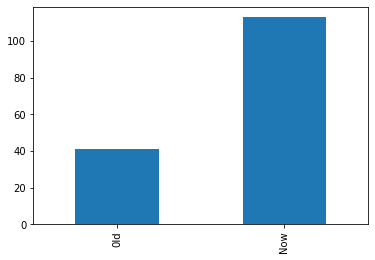

In [515]:
year.plot(kind='bar')  # 说明在好剧排行榜中,2000年后，好剧的数目在增长。

**各地区好剧数目统计**

In [522]:
data[data.中国大陆 == 1].shape[0]

116

In [539]:
data[data.中国大陆 == 1].score.mean()

9.037931034482757

In [521]:
data[data.中国台湾 == 1].shape[0]

11

In [540]:
data[data.中国台湾 == 1].score.mean()

8.890909090909089

In [520]:
data[data.中国香港 == 1].shape[0]

27

In [541]:
data[data.中国香港 == 1].score.mean()

8.866666666666667

In [547]:
dalu_score = data[data.中国大陆 == 1].sort_values(by='year').score

In [549]:
dalu_score.index = range(116)

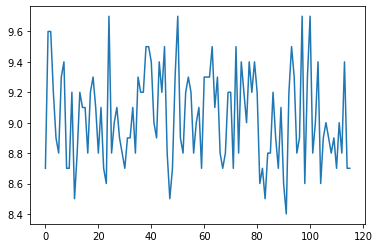

In [551]:
dalu_score.plot()  # 下面图表说明，大陆电视剧虽然高产，但是剧的质量层次不齐

#### pandas学习参考

***https://www.zhihu.com/question/56310477***